In [44]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(13)

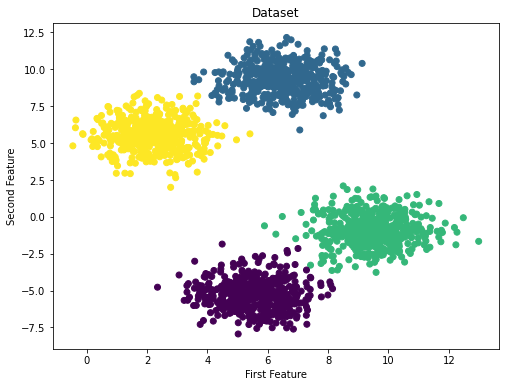

In [45]:
X, y_true = make_blobs(centers=4, n_samples=2000)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.show()

In [46]:
y_true = y_true[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (1500, 2)
Shape y_train: (1500, 1)
Shape X_test: (500, 2)
Shape y_test: (500, 1)


In [78]:
class SoftmaxRegression():
    def __init__(self):
        super().__init__()
        self.theta = None
        self.bias = None
        self.n_class = 0

    def softmax(self, Z):
        exp = np.exp(Z)
        sum_exp = np.sum(np.exp(Z), axis=1, keepdims=True)
        softmax = exp / sum_exp
        return softmax

    def one_hot(self, y):
        oh = np.zeros((self.n_sample, self.n_class))
        oh[np.arange(self.n_sample), y.T] = 1 #must set = 1 to get one hot!!!!!!!!
        return oh

    def fit(self, X, y_true, n_class, n_iterator=200, learning_rate=0.008):
        self.n_sample, n_features = X.shape
        self.n_class = n_class
        self.theta = np.random.rand(self.n_class, n_features)
        self.bias = np.zeros((1, self.n_class))

        losses=[]

        for i in range(n_iterator):
            scores = self.compute_scores(X)
            hx = self.softmax(scores)
            y_predict = np.argmax(hx, axis=1)[:, np.newaxis]
            y_one_hot = self.one_hot(y_true)

            #loss 是对应元素相乘，所以用*
            loss = -(1 / self.n_sample) * np.sum(y_one_hot * np.log(hx))
            losses.append(loss)

            #dtheta = -1/m * Sigma(xi * (hxi - yi)) = -1/m * (X (Hx - y)) 矩阵乘法
            dTheta = (1 / self.n_sample) * np.dot(X.T, hx - y_one_hot) #注意，只要np.dot, 不用np.sum(np.dot)
            dBias = (1 / self.n_class) * np.sum(hx - y_one_hot, axis=0)

            self.theta = self.theta - learning_rate * dTheta.T
            self.bias = self.bias - learning_rate * dBias

            if i % 100 == 0:
                print(f'Iteration number: {i}, Loss is: {np.round(loss, 4)}')

        return self.theta, self.bias, losses

    def predict(self, X):
        hx = self.softmax(np.dot(X, self.theta.T) + self.bias)
        y_predict = np.argmax(hx, axis=1)[:, np.newaxis]
        return y_predict

    def compute_scores(self, X):
        """
        计算X中样本的类别分数
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            scores: numpy array of shape (n_samples, n_classes)
        """
        return np.dot(X, self.theta.T) + self.bias


Iteration number: 0, Loss is: 2.1181
Iteration number: 100, Loss is: 0.0505
Iteration number: 200, Loss is: 0.0368
Iteration number: 300, Loss is: 0.0302
Iteration number: 400, Loss is: 0.0263
Iteration number: 500, Loss is: 0.0236
Iteration number: 600, Loss is: 0.0216
Iteration number: 700, Loss is: 0.02


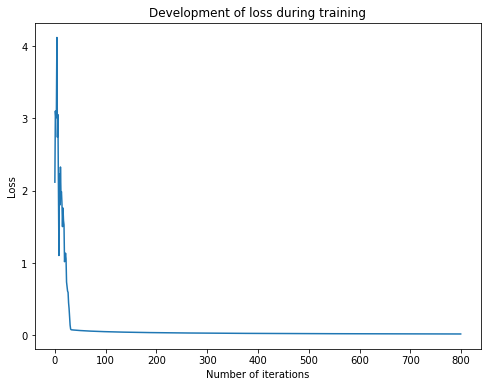

In [79]:
regressor = SoftmaxRegression()
theta, bias, losses = regressor.fit(X_train, y_train, n_class=4, n_iterator=800, learning_rate=0.05)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(800), losses)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [80]:
n_test_samples, _ = X_test.shape
print(n_test_samples)
y_predict = regressor.predict(X_test)
print(y_test.shape)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples) * 100}%")

500
(500, 1)
Classification accuracy on test set: 100.0%
